#                                WeRateDogs Project

#### Prepared by: Taha Badawy 

In [1]:
#Import all packages needed
import pandas as pd 
import numpy as np
import requests
import tweepy
from matplotlib import pyplot as plt
%matplotlib inline
import os
import seaborn as sb
import matplotlib
import json 
import PIL.Image
from io import BytesIO
from PIL import Image

## A - Data Sources (Gathering Data):

## All the data used in this project are gathered by 3 ways:


1- Twitter archive file it's CSV file downloaded manually from Udacity data resources.

2- The tweet image predictions it's TSV file downloaded programmatically from the giving link ( URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv ) and it describe the breed of dogs related to the neural network.

3- Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

### 1- Twitter archive file (CSV)

In [2]:
#read csv file:
df_twt_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_twt_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
df_twt_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [5]:
df_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2- Tweet image prediction (TSV):

In [6]:
#URL downloaded programatically 

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_twt_image = pd.read_csv('image-predictions.tsv', sep='\t' )

In [7]:
df_twt_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_twt_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [9]:
df_twt_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3- Twitter downloaded API and JSON files:

In [10]:
#Download data from Twitter API:
if not os.path.exists('tweet-json.txt'):
    get_twitter_data(df_twt_arch, 'tweet-json.txt')


In [11]:
#load Twitter data in pd:
with open('tweet-json.txt') as file:
    df_API = pd.read_json(file, lines = True, encoding = 'utf-8')

In [12]:
df_API.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [13]:
df_API.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [14]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### B - Assessing Data:

### 1- Visual Assessment:

In [15]:
df_twt_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
df_twt_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
df_API

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### 2 - Programmatic assessment:

In [18]:
#check datatype and columns data:
df_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
#Check data initial statistics:
df_twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
# Check Duplicated tweet ID:
df_twt_arch['tweet_id'].duplicated().sum()

0

In [21]:
#Check Columns Details:
df_twt_arch.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
#Check random 5 samples:
df_twt_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
725,782722598790725632,NaN,NaN,2016-10-02 23:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She fought a bee and the bee wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782722598...,10,10,Penny,None,None,None,None
1481,693280720173801472,NaN,NaN,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
391,826204788643753985,NaN,NaN,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",NaN,NaN,NaN,http://us.blastingnews.com/news/2017/01/kentuc...,13,10,None,doggo,None,None,None
469,816829038950027264,NaN,NaN,2017-01-05 02:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Betty. She's assisting ...,7.909461e+17,4.196984e+09,2016-10-25 16:00:09 +0000,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,None,None,None,puppo


In [23]:
#Rating denominator should be 10!!
df_twt_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
#Rating max score should be 10!!
df_twt_arch[df_twt_arch.rating_numerator >= 10].count()

tweet_id                      1916
in_reply_to_status_id           66
in_reply_to_user_id             66
timestamp                     1916
source                        1916
text                          1916
retweeted_status_id            172
retweeted_status_user_id       172
retweeted_status_timestamp     172
expanded_urls                 1867
rating_numerator              1916
rating_denominator            1916
name                          1916
doggo                         1916
floofer                       1916
pupper                        1916
puppo                         1916
dtype: int64

In [25]:
# check inconsistent names like 'a' and 'None'
df_twt_arch['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Beemo        1
Craig        1
Lugan        1
Monkey       1
Harry        1
Name: name, Length: 957, dtype: int64

In [26]:
df_twt_arch[df_twt_arch.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [27]:
#Check How many name start with small letter:
df_twt_arch['name'].str.islower().sum()

109

In [28]:
# Check Columns details and dtype of the Columns:
df_twt_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
#data intitial Statistics:
df_twt_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
#Random 10 samples to check data structures:
df_twt_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
1772,827933404142436356,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,2,German_shepherd,0.806115,True,Tibetan_mastiff,0.104831,True,kelpie,0.038148,True
1663,812372279581671427,https://pbs.twimg.com/media/C0YgO3DW8AAz98O.jpg,2,golden_retriever,0.784873,True,cocker_spaniel,0.087788,True,Labrador_retriever,0.083275,True
240,670442337873600512,https://pbs.twimg.com/media/CU3jwAYWwAAhdAv.jpg,1,Sussex_spaniel,0.403552,True,otterhound,0.256302,True,Irish_terrier,0.187315,True
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True


In [31]:
# Check How many predictions are for dogs and how many are not?

print(df_twt_image.p1_dog.value_counts())
print(df_twt_image.p2_dog.value_counts())
print(df_twt_image.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [32]:
#check duplicated data related to tweet ID:
sum(df_twt_image.tweet_id.duplicated())

0

In [33]:
#check duplicated data related to jpg_url:
sum(df_twt_image['jpg_url'].duplicated())

66

In [34]:
#Check json file Columns details and dtype of the columns: 
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [35]:
#Check random 10 samples of the data:
df_API.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
464,2017-01-06 01:31:47+00:00,817181837579653120,817181837579653120,RT @dog_rates: Here's a pupper with squeaky hi...,False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 815965888126062592, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Jan 02 17:00:46 +0000 2017...,NaN,NaN,NaN
401,2017-01-25 18:38:36+00:00,824325613288833024,824325613288833024,Retweet the h*ck out of this 13/10 pupper #Bel...,False,"[0, 55]","{'hashtags': [{'text': 'BellLetsTalk', 'indice...","{'media': [{'id': 824325607026737152, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12999,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
16,2017-07-23 00:22:39+00:00,888917238123831296,888917238123831296,This is Jim. He found a fren. Taught him how t...,False,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 888917229776945152, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,29611,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
465,2017-01-06 00:49:53+00:00,817171292965273600,817171292965273600,This is Tebow. He kindly requests that you put...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817171279044313089, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9690,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
373,2017-02-05 22:40:03+00:00,828372645993398273,828372645993398272,This is Alexander Hamilpup. He was one of the ...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 828372634769440768, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13756,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1411,2016-02-14 16:33:40+00:00,698907974262222848,698907974262222848,This dog is never sure if he's doing the right...,False,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 698907962606292992, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2787,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
891,2016-07-30 17:51:13+00:00,759446261539934208,759446261539934208,No no no this is all wrong. The Walmart had to...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1846,False,False,0.0,0.0,en,NaN,7.591676e+17,7.591676e+17,{'created_at': 'Fri Jul 29 23:23:45 +0000 2016...
1458,2016-02-04 01:07:39+00:00,695051054296211456,695051054296211456,"Meet Brian (pronounced ""Kirk""). He's not amuse...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695051050697539585, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2918,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
279,2017-03-08 18:52:12+00:00,839549326359670784,839549326359670784,Meet Winston. He knows he's a little too big f...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 839549305585295362, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,29957,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1160,2016-04-23 01:41:59+00:00,723688335806480385,723688335806480384,This is Reginald. He starts screaming at rando...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 723688327916998657, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8435,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [36]:
# Check all used languanges:
df_API.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
es        1
ro        1
eu        1
et        1
Name: lang, dtype: int64

#### Assessing points:

## Tidiness:


1- Convert 'timestamp' column dtype to Year, Month and Day datetime Columns.

2- Drop 'timestamp' Cloumn.

3- Creat new Dog Stage column for Dogs classification.


## Quality:

### (Twitter_Archive)

1- Change denominator ratings & numerator ratings str to float.

2- Adjust mistyping of numerator ratings values >10.

3- replace all denominator ratings to be 10

4- Convert all dogs 'name' to be 1st letter capitalized.

5- Rename columns 'name' to 'dog_name' and 'text' to 'tweets'.

6- Drop 'Doggo', 'Floofer', 'Pupper' and 'Puppo' Columns.

7- Separate between words DoggoPupper, DoggoFloofer and DoggoPuppo to (Doggo, Pupper), (Doggo, Floofer) and (Doggo, Puppo)

8- Remove Retweets but Keep original ratings that have images.

9- Drop all unuseful data columns for data analysis.


### (image_Prediction)

10- Drop all duplicated jpg_url.

11-Drop all non dogs predictions.

### (Tweet_json)

12 - Drop all unuseful Columns for data analysis.

13- Rename id to tweet_id to be consistent with others files during merging.

14- keep only English language tweets


## Tidiness:

4- Combine all 3 different files to master data set.


=======================================================================

# C - Cleaning Data :

In [37]:
# Copy data from all files:
twt_arch_clean = df_twt_arch.copy()
twt_image_clean = df_twt_image.copy()
API_clean = df_API.copy()

## Tidness:


Covert 'timestamp' to datetime.

## Code:

In [38]:
twt_arch_clean['timestamp'] = pd.to_datetime(twt_arch_clean['timestamp'])

#create new  year, month and day columns:
twt_arch_clean['year'] = twt_arch_clean['timestamp'].dt.year
twt_arch_clean['month'] = twt_arch_clean['timestamp'].dt.month
twt_arch_clean['weekday'] =twt_arch_clean['timestamp'].dt.day_name()

## Test: 

In [39]:
twt_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,weekday
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,Tuesday
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,Tuesday
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,Monday
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,Sunday
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,Saturday


## Define:

drop 'timestamp' cloumn

## Code:

In [40]:
# drop 'timestamp' cloumn:
twt_arch_clean = twt_arch_clean.drop(['timestamp'], axis=1)

## Test:

In [41]:
twt_arch_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,weekday
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,Tuesday
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,Tuesday
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,Monday
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,Sunday
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,Saturday


## Define 

Creat new Dog Stage column for Dogs classification.

## Code

In [42]:
#use for loop to create the stage:
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for x in stage:
       twt_arch_clean[x] = twt_arch_clean[x].replace('None', '')

In [43]:
# combine all cloumns in dog_stage column:
twt_arch_clean['dog_stage'] = twt_arch_clean.doggo.str.cat(twt_arch_clean.floofer).str.cat(twt_arch_clean.pupper).str.cat(twt_arch_clean.puppo)

In [44]:
# drop the four old colomns
twt_arch_clean = twt_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [45]:
# fill empty spaces by NaN:
twt_arch_clean['dog_stage'] = twt_arch_clean['dog_stage'].replace('', np.nan)

## Test

In [46]:
twt_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,year,month,weekday,dog_stage
2027,671874878652489728,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671874878...,10,10,Mia,2015,12,Wednesday,NaN
870,761672994376806400,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994...,10,10,None,2016,8,Friday,NaN
1826,676440007570247681,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,2015,12,Monday,NaN
271,841077006473256960,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,2017,3,Monday,NaN
400,824775126675836928,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,2017,1,Friday,NaN


# Quality:

## (Tweeter_archive)

## Define:

Change numerator & denominator rating type to float. 

## Code:

In [47]:
twt_arch_clean[['rating_numerator', 'rating_denominator']] = twt_arch_clean[['rating_numerator','rating_denominator']].astype(float)

## Test:

In [48]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   float64
 10  rating_denominator          2356 non-null   float64
 11  name                        2356 non-null   object 
 12  year                        2356 non-null   int64  
 13  month                       2356 

## Define:

Adjust mistyping of numerator ratings values >= 20.

## Code:

In [49]:
for i in range(1,len(twt_arch_clean.rating_numerator),1):
    if twt_arch_clean.rating_numerator.iloc[i]<=20:
        continue
    elif twt_arch_clean.rating_numerator.iloc[i] > 20 and twt_arch_clean.rating_numerator.iloc[i]<=200:
        twt_arch_clean.rating_numerator.iloc[i] = twt_arch_clean.rating_numerator.iloc[i]*0.1 
    elif twt_arch_clean.rating_numerator.iloc[i]>200: 
        twt_arch_clean.rating_numerator.iloc[i] = twt_arch_clean.rating_numerator.iloc[i]*0.01

C:\Users\b\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Test:

In [50]:
twt_arch_clean.rating_numerator.value_counts()

12.00    558
11.00    464
10.00    461
13.00    351
9.00     158
8.00     103
7.00      55
14.00     54
5.00      38
6.00      33
3.00      19
4.00      17
1.00       9
2.00       9
7.50       2
0.00       2
4.20       2
15.00      2
17.00      1
8.40       1
4.50       1
16.50      1
12.10      1
9.90       1
17.76      1
2.40       1
2.60       1
14.30      1
14.40      1
4.40       1
9.60       1
2.70       1
8.80       1
18.20      1
6.66       1
2.04       1
20.00      1
Name: rating_numerator, dtype: int64

## Define:


Standerdize denominator ratings to be 10.

## Code:

In [51]:
twt_arch_clean['rating_denominator'] = 10.0

## Test:

In [52]:
twt_arch_clean['rating_denominator'].value_counts()

10.0    2356
Name: rating_denominator, dtype: int64

## Define:

Capitalize 1st letter in Dogs name column:

## Code:

In [53]:
twt_arch_clean['name'] = twt_arch_clean['name'].str.title()

## Test:

In [54]:
twt_arch_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           A
2353           A
2354           A
2355        None
Name: name, Length: 2356, dtype: object

## Define:

Rename name & text to be more constent.

## Code:

In [55]:
twt_arch_clean = twt_arch_clean.rename(columns={'text':'tweets', 'name':'dog_name' })

## Test:

In [56]:
list(twt_arch_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'tweets',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'year',
 'month',
 'weekday',
 'dog_stage']

## Define 

Separate between words DoggoPupper, DoggoFloofer and DoggoPuppo to (Doggo, Pupper), (Doggo, Floofer) and (Doggo, Puppo)

## Code

In [57]:
twt_arch_clean.dog_stage .value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [58]:
twt_arch_clean.loc[twt_arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'

In [59]:
twt_arch_clean.loc[twt_arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [60]:
twt_arch_clean.loc[twt_arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'

## Test

In [61]:
twt_arch_clean.dog_stage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

## Define 

Remove Retweets but Keep original ratings that have images.



## Code 

In [62]:
twt_arch_clean = twt_arch_clean[twt_arch_clean.retweeted_status_id.isnull()]
twt_arch_clean = twt_arch_clean[twt_arch_clean.retweeted_status_user_id.isnull()]
twt_arch_clean = twt_arch_clean[twt_arch_clean.retweeted_status_timestamp.isnull()]

## Test 

In [63]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   source                      2175 non-null   object 
 4   tweets                      2175 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2117 non-null   object 
 9   rating_numerator            2175 non-null   float64
 10  rating_denominator          2175 non-null   float64
 11  dog_name                    2175 non-null   object 
 12  year                        2175 non-null   int64  
 13  month                       2175 

## Define: 

Drop all unused columns in the analysis:

## Code:

In [64]:
twt_arch_clean=twt_arch_clean.drop(['retweeted_status_id','in_reply_to_status_id','in_reply_to_user_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls','source'], axis = 1)

In [65]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   tweets              2175 non-null   object 
 2   rating_numerator    2175 non-null   float64
 3   rating_denominator  2175 non-null   float64
 4   dog_name            2175 non-null   object 
 5   year                2175 non-null   int64  
 6   month               2175 non-null   int64  
 7   weekday             2175 non-null   object 
 8   dog_stage           344 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 169.9+ KB


## (Image_prediction)


## Define:

Drop duplicates of jpg_url coulmn:

## Code:

In [66]:
twt_image_clean = twt_image_clean.drop_duplicates(subset=['jpg_url'], keep='first')

## Test:

In [67]:
sum(twt_image_clean['jpg_url'].duplicated())

0

## Define:

Drop all non dogs preidiction:

## Code:

In [68]:
#create new lists for dog type and conf. list:
dog_type = []
confidence_list = []

#from the function and nested if to fill the new lists with true values of function:
# from the first 'true' prediction
def image(twt_image_clean):
    if twt_image_clean['p1_dog'] == True:
        dog_type.append(twt_image_clean['p1'])
        confidence_list.append(twt_image_clean['p1_conf'])
    elif twt_image_clean['p2_dog'] == True:
        dog_type.append(twt_image_clean['p2'])
        confidence_list.append(twt_image_clean['p2_conf'])
    elif twt_image_clean['p3_dog'] == True:
        dog_type.append(twt_image_clean['p3'])
        confidence_list.append(twt_image_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
twt_image_clean.apply(image, axis=1)

#create new columns
twt_image_clean['dog_type'] = dog_type
twt_image_clean['confidence_list'] = confidence_list

## Test:

In [69]:
twt_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         2009 non-null   int64  
 1   jpg_url          2009 non-null   object 
 2   img_num          2009 non-null   int64  
 3   p1               2009 non-null   object 
 4   p1_conf          2009 non-null   float64
 5   p1_dog           2009 non-null   bool   
 6   p2               2009 non-null   object 
 7   p2_conf          2009 non-null   float64
 8   p2_dog           2009 non-null   bool   
 9   p3               2009 non-null   object 
 10  p3_conf          2009 non-null   float64
 11  p3_dog           2009 non-null   bool   
 12  dog_type         2009 non-null   object 
 13  confidence_list  2009 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 194.2+ KB


## Define:

Drop all rows is not for dogs

## Code:

In [70]:
# drop all rows is not for dogs:
twt_image_clean = twt_image_clean[twt_image_clean['dog_type'] != 'Error']

## Test:

In [71]:
twt_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_type         1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


## Define:

Drop useless column in the analysis:

## Code:


In [72]:
twt_image_clean = twt_image_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

## Test:


In [73]:
twt_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   dog_type         1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


# (Tweet_json)

## Define:

Rename id column to be tweet_id for consistancy with other files:

## Code: 


In [74]:
API_clean = API_clean.rename(columns={'id':'tweet_id'})

## Test:

In [75]:
API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Define:

 Drop rows of other languages than English:

In [76]:
API_clean.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
es        1
ro        1
eu        1
et        1
Name: lang, dtype: int64

## Code:

In [77]:

API_clean = API_clean[API_clean.lang == 'en']


## Test:

In [78]:
API_clean.lang.value_counts()

en    2336
Name: lang, dtype: int64

## Define:


Drop all unusefull columns for analysis:

## Code: 

In [79]:
API_clean=API_clean.drop(['created_at','full_text','geo','truncated','favorited','display_text_range','retweeted_status','retweeted','coordinates','place',
 'contributors','in_reply_to_status_id',
 'in_reply_to_status_id_str','id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name','quoted_status_id',
 'quoted_status_id_str',
 'quoted_status','source','display_text_range','is_quote_status','entities','extended_entities','user','possibly_sensitive','possibly_sensitive_appealable'],axis=1)

## Test:

In [80]:
list(API_clean)

['tweet_id', 'retweet_count', 'favorite_count', 'lang']

In [81]:
API_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2336 non-null   int64 
 1   retweet_count   2336 non-null   int64 
 2   favorite_count  2336 non-null   int64 
 3   lang            2336 non-null   object
dtypes: int64(3), object(1)
memory usage: 91.2+ KB


# Tidness:


## Define:

Merge all cleaned files to form one master data set:

## Code:

In [82]:
# Merge cleaned archive file with tweet json file:
twt_merge=pd.merge(twt_arch_clean, API_clean, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [83]:
twt_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2160 non-null   int64  
 1   tweets              2160 non-null   object 
 2   rating_numerator    2160 non-null   float64
 3   rating_denominator  2160 non-null   float64
 4   dog_name            2160 non-null   object 
 5   year                2160 non-null   int64  
 6   month               2160 non-null   int64  
 7   weekday             2160 non-null   object 
 8   dog_stage           344 non-null    object 
 9   retweet_count       2160 non-null   int64  
 10  favorite_count      2160 non-null   int64  
 11  lang                2160 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 219.4+ KB


In [84]:
# Merge twt_megre file with twt_image_clean file:
Twitter_Cleaned=pd.merge(twt_merge, twt_image_clean, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

## Test:

In [85]:
Twitter_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1681 entries, 0 to 1680
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1681 non-null   int64  
 1   tweets              1681 non-null   object 
 2   rating_numerator    1681 non-null   float64
 3   rating_denominator  1681 non-null   float64
 4   dog_name            1681 non-null   object 
 5   year                1681 non-null   int64  
 6   month               1681 non-null   int64  
 7   weekday             1681 non-null   object 
 8   dog_stage           260 non-null    object 
 9   retweet_count       1681 non-null   int64  
 10  favorite_count      1681 non-null   int64  
 11  lang                1681 non-null   object 
 12  jpg_url             1681 non-null   object 
 13  dog_type            1681 non-null   object 
 14  confidence_list     1681 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 210.1+

In [86]:
Twitter_Cleaned.sample(10)

,tweet_id,tweets,rating_numerator,rating_denominator,dog_name,year,month,weekday,dog_stage,retweet_count,favorite_count,lang,jpg_url,dog_type,confidence_list
1439,829449946868879360,Here's a stressed doggo. Had a long day. Many ...,11.0,10.0,None,2017,2,Wednesday,doggo,2329,11519,en,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,Labrador_retriever,0.315163
786,707741517457260545,When your roommate eats your leftover Chili's ...,10.0,10.0,None,2016,3,Thursday,NaN,696,2718,en,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,whippet,0.738371
507,682389078323662849,Meet Brody. He's a Downton Abbey Falsetto. Add...,9.0,10.0,Brody,2015,12,Thursday,NaN,518,1828,en,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,curly-coated_retriever,0.482288
1459,832757312314028032,This is Willow. She's the official strawberry ...,13.0,10.0,Willow,2017,2,Saturday,NaN,4127,18423,en,https://pbs.twimg.com/media/C46MWnFVYAUg1RK.jpg,Cardigan,0.160888
117,668779399630725120,This is Kevon. He is not physically or mentall...,10.0,10.0,Kevon,2015,11,Monday,NaN,409,749,en,https://pbs.twimg.com/media/CUf7UIaWUAEuKFr.jpg,Chesapeake_Bay_retriever,0.285508
173,670385711116361728,Meet Larry. He's a Panoramic Benzoate. Can sho...,8.0,10.0,Larry,2015,11,Friday,NaN,234,593,en,https://pbs.twimg.com/media/CU2wPyWWUAAb1MJ.jpg,whippet,0.178027
968,739979191639244800,This is Nollie. She's waving at you. If you do...,12.0,10.0,Nollie,2016,6,Tuesday,NaN,6719,21898,en,https://pbs.twimg.com/media/CkTvJTdXAAAEfbT.jpg,Irish_water_spaniel,0.2858
43,666996132027977728,This is Carll. He wants to be a donkey. But al...,10.0,10.0,Carll,2015,11,Wednesday,NaN,102,258,en,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,Rottweiler,0.0624899
293,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,10.0,10.0,A,2015,12,Sunday,NaN,404,1194,en,https://pbs.twimg.com/media/CVk9ApFWUAA-S1s.jpg,pug,0.0190443
1377,818259473185828864,This is Florence. He saw the same snap you sen...,12.0,10.0,Florence,2017,1,Monday,NaN,2621,12197,en,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,miniature_schnauzer,0.367368


# Sorting Data:

In [87]:
# Save cleaned data in new CSV file:
Twitter_Cleaned.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

# Visualization Data:

In [88]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [89]:
#Check most popular dog type:
df_master['dog_type'].value_counts()

golden_retriever      157
Labrador_retriever    107
Pembroke               95
Chihuahua              91
pug                    62
                     ... 
Irish_wolfhound         1
EntleBucher             1
Scotch_terrier          1
clumber                 1
standard_schnauzer      1
Name: dog_type, Length: 113, dtype: int64

Text(0, 0.5, 'Counts')

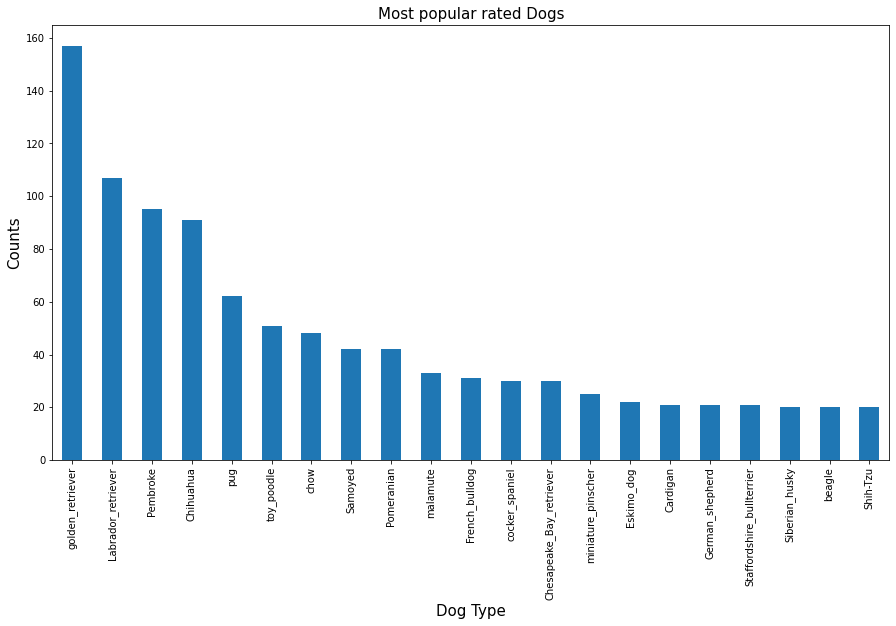

In [90]:
dog_type = df_master.groupby('dog_type').filter(lambda x: len(x) >= 20)

dog_type['dog_type'].value_counts().plot(kind = 'bar', figsize = (15, 8))
plt.title('Most popular rated Dogs', fontsize = 15)
plt.xlabel('Dog Type', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)


### The most popular Dog type is 'Golden retriever'

In [91]:
df_master[df_master['dog_type'] == 'golden_retriever']

,tweet_id,tweets,rating_numerator,rating_denominator,dog_name,year,month,weekday,dog_stage,retweet_count,favorite_count,lang,jpg_url,dog_type,confidence_list
7,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,A,2015,11,Monday,NaN,146,304,en,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.007959
9,666063827256086533,This is the happiest dog you will ever see. Ve...,10.0,10.0,The,2015,11,Monday,NaN,232,496,en,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930
19,666345417576210432,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,2015,11,Monday,NaN,146,307,en,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744
44,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,2015,11,Wednesday,NaN,54,198,en,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266
51,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,2015,11,Thursday,NaN,66,268,en,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,883117836046086144,Please only send dogs. We don't rate mechanics...,13.0,10.0,None,2017,7,Friday,NaN,6949,37914,en,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,golden_retriever,0.949562
1644,883482846933004288,This is Bella. She hopes her smile made you sm...,5.0,10.0,Bella,2017,7,Saturday,NaN,10407,46860,en,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082
1664,888804989199671297,This is Zeke. He has a new stick. Very proud o...,13.0,10.0,Zeke,2017,7,Saturday,NaN,4559,26080,en,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,golden_retriever,0.469760
1665,888917238123831296,This is Jim. He found a fren. Taught him how t...,12.0,10.0,Jim,2017,7,Sunday,NaN,4709,29611,en,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,golden_retriever,0.714719


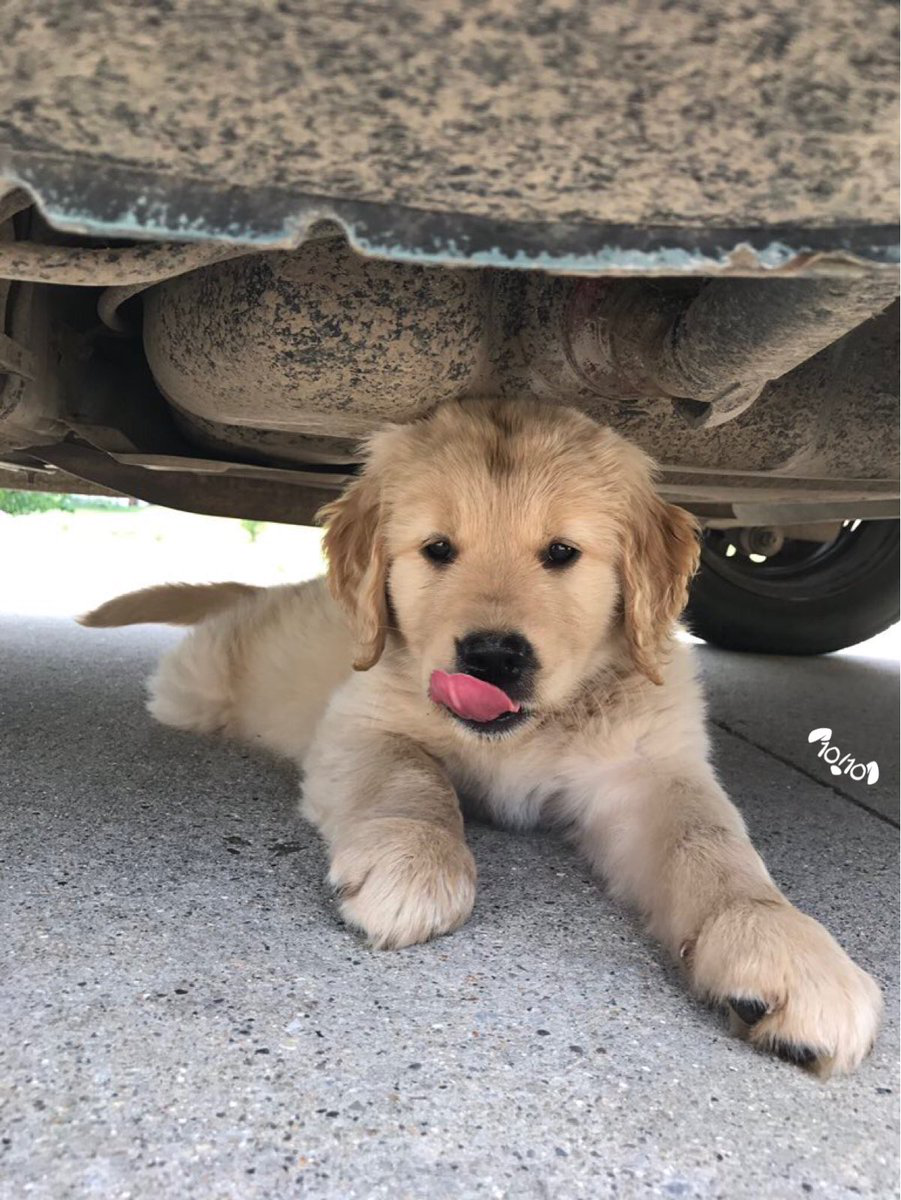

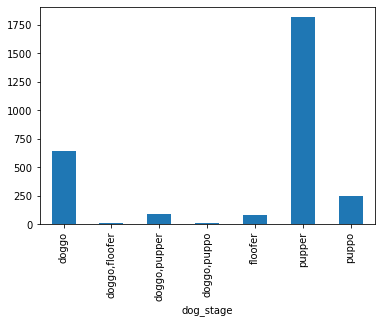

In [92]:
# some pics for Golden retriver.#highest Dogs Stage according to total rate visitors
df_master.groupby("dog_stage")['rating_numerator'].sum().plot(kind='bar');
url = df_master.jpg_url[1642]
r = requests.get(url)
Image.open(BytesIO(r.content))

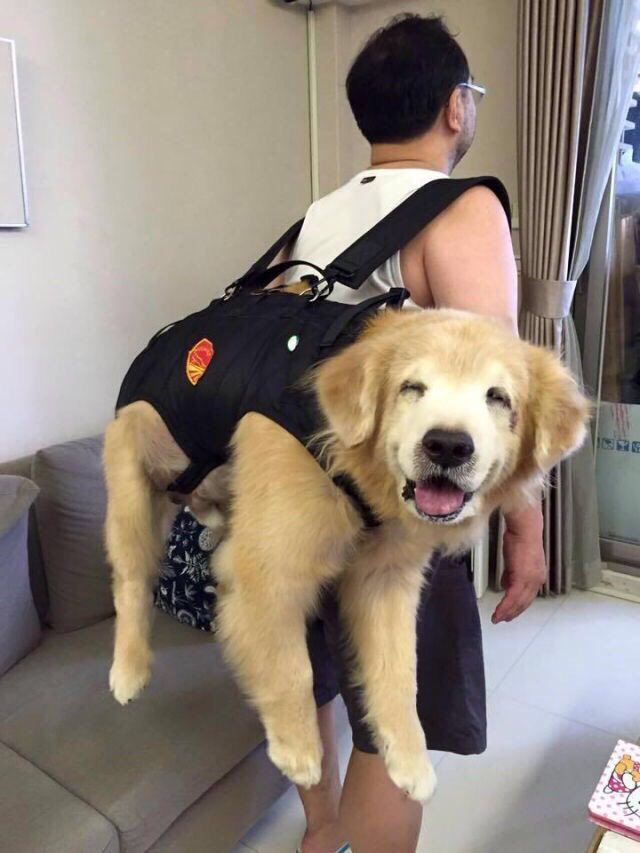

In [93]:
# pic for Golden retriver.
url = df_master.jpg_url[9]
r = requests.get(url)
Image.open(BytesIO(r.content))

In [94]:
df_master['dog_stage'].value_counts()

pupper           168
doggo             54
puppo             21
doggo,pupper       8
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

Text(0, 0.5, 'Counts')

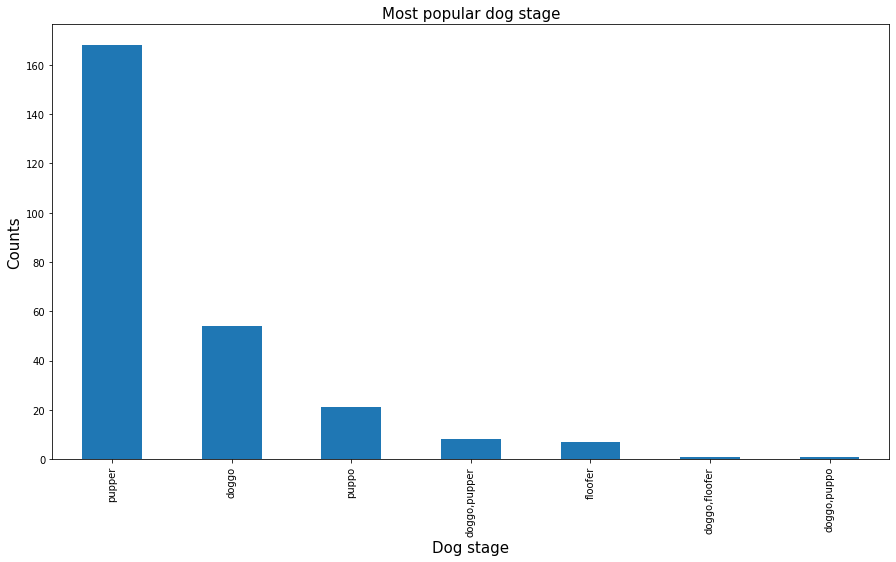

In [95]:
df_master['dog_stage'].value_counts().plot(kind = 'bar', figsize = (15, 8))
plt.title('Most popular dog stage', fontsize = 15)
plt.xlabel('Dog stage', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

### The Most popular dog stage according to Counts is Pupper

Text(0.5, 1.0, 'Retweet Counts by Ratings')

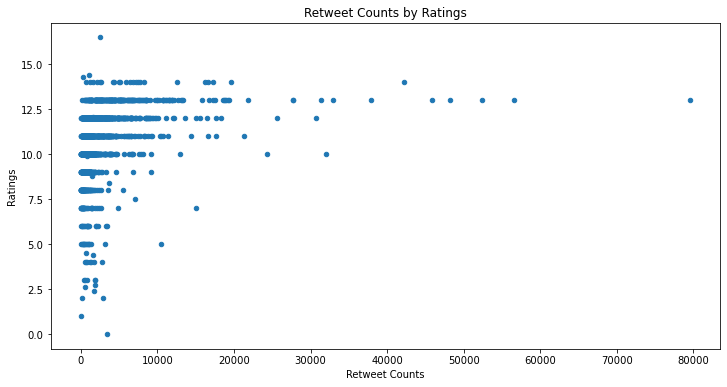

In [96]:
df_master.plot(x='retweet_count', y='rating_numerator', kind='scatter', figsize = (12, 6))
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings')


### The highst ratings didn't get the most of the retweets

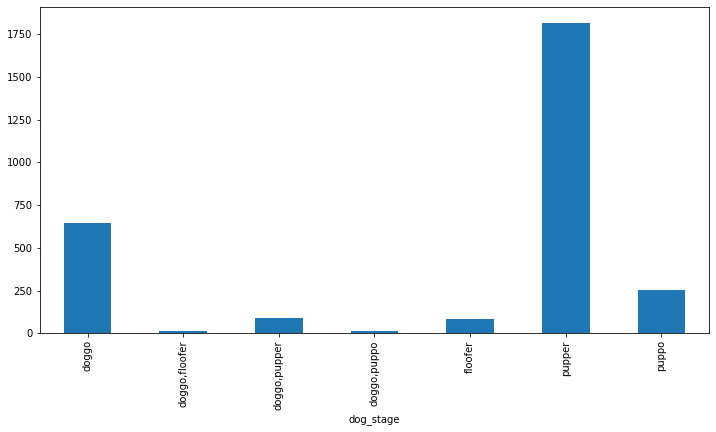

In [97]:
# Dogs Stage according to total rate. 
df_master.groupby("dog_stage")['rating_numerator'].sum().plot(kind='bar', figsize = (12, 6));

## The highst Dog stage according to rating score is Pupper

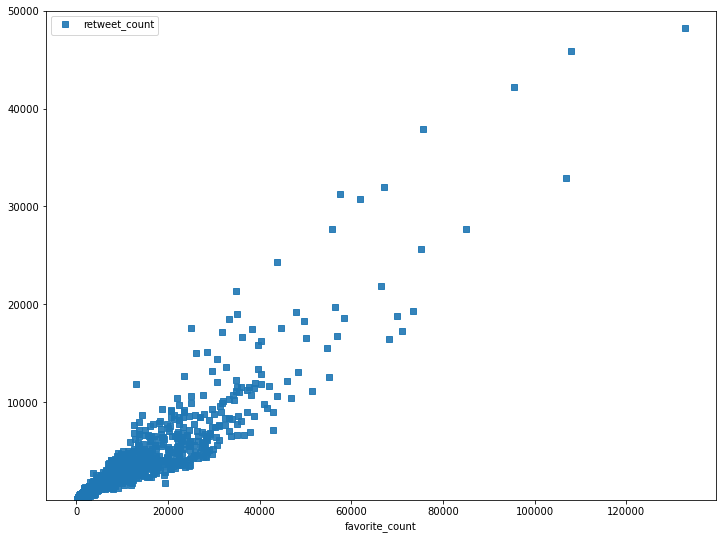

In [98]:
## retweet count over time with favorite counts
df_master.plot(y='retweet_count',x='favorite_count',style='s',alpha=0.9,figsize=(12,9),ylim=[10,50000]);

### Retweet count over time with favorite counts.